In [35]:
import sentinelhub
from sentinelhub import SHConfig
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely.geometry

In [43]:
# bbox
bbox = (-4.860230,47.428380,-0.982056,48.897512)
bbox_poly = shapely.geometry.box(*bbox, ccw=True)


# start-end times
start = datetime.datetime(2018,4,1)
end = datetime.datetime(2018,9,30)

NameError: name 'df' is not defined

AttributeError: 'Polygon' object has no attribute 'plot'

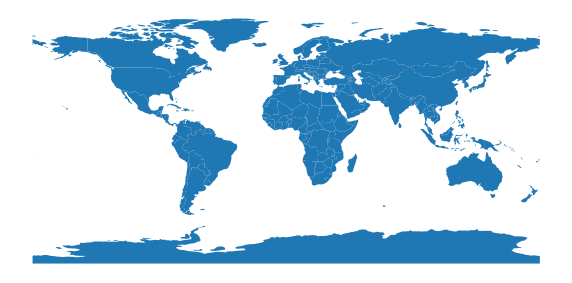

In [42]:

ax = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(figsize=(10, 8))
ax.set_axis_off()
bbox_poly.plot(ax=ax)
plt.show()